In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
derecho_calls = pd.read_csv('../data/911_Phone Calls_Derecho_050320_050420.csv')
tornado_calls = pd.read_csv('../data/911_Phone_Calls_Tornado_030320.csv')
derecho_dispatch = pd.read_csv('../data/Computer Aided Dispatch Data_Derecho Incidents 050320-050420.csv', skiprows = 2)
tornado_dispatch = pd.read_csv('../data/Computer Aided Dispatch Data_Tornado Incidents 030320.csv', skiprows = 2)
damage_points = gpd.read_file('../data/damage_points.geojson')
path_polygons = gpd.read_file('../data/path_polygons.geojson')
tornado_paths = gpd.read_file('../data/tornado_paths.geojson')

In [3]:
print(derecho_calls.shape)
print(tornado_calls.shape)
print(derecho_dispatch.shape)
print(tornado_dispatch.shape)
print(damage_points.shape)
print(path_polygons.shape)
print(tornado_paths.shape)

(1549, 5)
(475, 5)
(627, 5)
(260, 5)
(3967, 27)
(37, 2)
(7, 29)


In [4]:
type(derecho_calls)

pandas.core.frame.DataFrame

In [5]:
type(tornado_calls)

pandas.core.frame.DataFrame

In [6]:
type(derecho_dispatch)

pandas.core.frame.DataFrame

In [7]:
type(tornado_dispatch)

pandas.core.frame.DataFrame

In [8]:
type(damage_points)

geopandas.geodataframe.GeoDataFrame

In [9]:
type(path_polygons)

geopandas.geodataframe.GeoDataFrame

In [10]:
type(tornado_paths)

geopandas.geodataframe.GeoDataFrame

#### Updating Column Headers for CSV files

In [11]:
derecho_calls.columns = ['time', 'Call_Type', 'lat', 'lng', 'Cell_Tower_Address']
tornado_calls.columns = ['time', 'Call_Type', 'lat', 'lng', 'Cell_Tower_Address']
derecho_dispatch.columns = ['time', 'Location', 'lat', 'lng', 'Incident_Type']
tornado_dispatch.columns = ['time', 'Location', 'lat', 'lng', 'Incident_Type']

In [12]:
derecho_calls.head()

time  Call_Type        lat        lng     Cell_Tower_Address
0  5/3/2020 16:30  911 Calls  36.247802 -86.716847        WIRELESS CALLER
1  5/3/2020 16:30  911 Calls  36.143108 -86.800621    1161 21ST AV S - SE
2  5/3/2020 16:30  911 Calls  36.100516 -87.056329  8013 C MCCRORY LN - N
3  5/3/2020 16:30  911 Calls  36.130021 -86.927819     5758 RIVER RD - SW
4  5/3/2020 16:31  911 Calls  36.142380 -86.881882   3744B ANNEX AVE - SE

In [13]:
derecho_calls.tail()

time  Call_Type        lat        lng  \
1544  5/4/2020 0:18  911 Calls  36.131694 -86.770535   
1545  5/4/2020 0:22  911 Calls  36.042237 -86.743455   
1546  5/4/2020 0:25  911 Calls  36.077664 -86.655607   
1547  5/4/2020 0:29  911 Calls  36.024706 -86.743562   
1548  5/4/2020 0:29  911 Calls        NaN        NaN   

                       Cell_Tower_Address  
1544         1823-C 12TH AV - SECTOR SE S  
1545     5244-C EDMONSON PIKE - SECTOR SE  
1546  2747-B MURFREESBORO PKE - SECTOR NW  
1547               302 SUMMIT VIEW DR - E  
1548                2014 QUAIL HOLLOW CIR

In [14]:
derecho_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                1549 non-null   object 
 1   Call_Type           1549 non-null   object 
 2   lat                 1483 non-null   float64
 3   lng                 1483 non-null   float64
 4   Cell_Tower_Address  1525 non-null   object 
dtypes: float64(2), object(3)
memory usage: 60.6+ KB


In [15]:
tornado_calls.head()

time  Call_Type        lat        lng          Cell_Tower_Address
0  3/3/2020 0:34  911 Calls  36.072708 -86.665779  620 Richards RD - N Sector
1  3/3/2020 0:36  911 Calls  36.159634 -86.841904      4507D KENTUCKY AV - SE
2  3/3/2020 0:36  911 Calls  36.264153 -86.708862    329 THELMA ST - S Sector
3  3/3/2020 0:36  911 Calls        NaN        NaN              526 FOUNDRY DR
4  3/3/2020 0:36  911 Calls  36.233467 -86.721077        5007B RUSKIN AVE - N

In [16]:
tornado_calls.tail()

time  Call_Type        lat        lng  \
470  3/3/2020 4:54  911 Calls  36.142552 -86.635330   
471  3/3/2020 4:54  911 Calls  36.189415 -86.813557   
472  3/3/2020 4:55  911 Calls  36.223534 -86.757874   
473  3/3/2020 4:56  911 Calls  36.168398 -86.783774   
474  3/3/2020 4:58  911 Calls  36.276566 -86.799417   

                    Cell_Tower_Address  
470                    WIRELESS CALLER  
471                    WIRELESS CALLER  
472                    WIRELESS CALLER  
473  600 DR MARTIN L KING JR BLVD - NE  
474             4884 LICKTON PIKE - SE

In [17]:
tornado_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                475 non-null    object 
 1   Call_Type           475 non-null    object 
 2   lat                 450 non-null    float64
 3   lng                 450 non-null    float64
 4   Cell_Tower_Address  468 non-null    object 
dtypes: float64(2), object(3)
memory usage: 18.7+ KB


In [18]:
derecho_dispatch.head()

time            Location        lat        lng  \
0  5/3/2020 4:31:07 PM    901 KENWICK CT W  36.046877 -86.962526   
1  5/3/2020 4:32:18 PM       8036 ARBOR DR  36.082491 -86.940680   
2  5/3/2020 4:32:23 PM   119 DUE WEST AV E  36.248029 -86.716875   
3  5/3/2020 4:33:04 PM  630 GALLATIN PKE S  36.256491 -86.714817   
4  5/3/2020 4:33:52 PM   615 W HILLWOOD DR  36.129690 -86.879834   

       Incident_Type  
0  ELECTRICAL HAZARD  
1  ELECTRICAL HAZARD  
2     NOT ALERT COPD  
3     ABDOMINAL PAIN  
4  ELECTRICAL HAZARD

In [19]:
derecho_dispatch.tail()

time          Location        lat        lng  \
622  5/4/2020 12:21:00 AM     625 BENTON AV  36.131384 -86.770628   
623  5/4/2020 12:21:32 AM  518 BRENTLAWN DR  36.064362 -86.761199   
624  5/4/2020 12:22:47 AM     517 ALBANY DR  36.212754 -86.600431   
625  5/4/2020 12:27:52 AM  639 LAFAYETTE ST  36.153769 -86.777520   
626  5/4/2020 12:29:50 AM    2011 HAYES ST   36.151839 -86.800791   

                                        Incident_Type  
622                        HIGH RISE NATURAL GAS ODOR  
623                                    UNKNOWN STATUS  
624                                 ELECTRICAL HAZARD  
625                 SICK PERSON: NO PRIORITY SYMPTOMS  
626  PULL STATION ALARM COMMERCIAL   INDUSTRIAL BUILD

In [20]:
derecho_dispatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           627 non-null    object 
 1   Location       627 non-null    object 
 2   lat            627 non-null    float64
 3   lng            627 non-null    float64
 4   Incident_Type  627 non-null    object 
dtypes: float64(2), object(3)
memory usage: 24.6+ KB


In [21]:
tornado_dispatch.head()

time                  Location        lat        lng  \
0  3/3/2020 12:36:34 AM   6205 COCKRILL BEND CIR   36.182002 -86.894052   
1  3/3/2020 12:37:24 AM  7337 COCKRILL BEND BLVD   36.175666 -86.894978   
2  3/3/2020 12:38:17 AM      110 TUNE AIRPORT DR   36.179299 -86.883727   
3  3/3/2020 12:39:40 AM          555 MARRIOTT DR   36.151108 -86.689921   
4  3/3/2020 12:39:42 AM  1414 COUNTY HOSPITAL RD   36.177926 -86.845934   

                                 Incident_Type  
0  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD  
1  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD  
2       STRUCTURE FIRE COMMERCIAL   INDUSTRIAL  
3  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD  
4  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD

In [22]:
tornado_dispatch.tail()

time                     Location        lat        lng  \
255  3/3/2020 4:53:43 AM               1616 23RD AV N  36.175739 -86.813173   
256  3/3/2020 4:56:56 AM        5610 OLD HICKORY BLVD  36.180487 -86.601466   
257  3/3/2020 4:57:06 AM          2903 MORNINGSIDE DR  36.223554 -86.757949   
258  3/3/2020 4:57:14 AM               1730 KELLOW ST  36.189445 -86.813466   
259  3/3/2020 4:57:48 AM  I24 W / HICKORY HOLLOW PKWY  36.039720 -86.649099   

                                         Incident_Type  
255  WIRES DOWN WITH NO SMOKE OR ARCING POWER DISCO...  
256                       LARGE BUILDING INVESTIGATION  
257                    CHEST PAIN - ABNORMAL BREATHING  
258             ABNORMAL BREATHING OTHER LUNG PROBLEMS  
259                                    UNKNOWN STATUS:

In [23]:
tornado_dispatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           260 non-null    object 
 1   Location       260 non-null    object 
 2   lat            260 non-null    float64
 3   lng            260 non-null    float64
 4   Incident_Type  260 non-null    object 
dtypes: float64(2), object(3)
memory usage: 10.3+ KB


#### Formatting the Date Time Column

In [24]:
derecho_calls.time = pd.to_datetime(derecho_calls.time)
tornado_calls.time = pd.to_datetime(tornado_calls.time)
derecho_dispatch.time = pd.to_datetime(derecho_dispatch.time)
tornado_dispatch.time = pd.to_datetime(tornado_dispatch.time)

In [25]:
derecho_calls.time

0      2020-05-03 16:30:00
1      2020-05-03 16:30:00
2      2020-05-03 16:30:00
3      2020-05-03 16:30:00
4      2020-05-03 16:31:00
               ...        
1544   2020-05-04 00:18:00
1545   2020-05-04 00:22:00
1546   2020-05-04 00:25:00
1547   2020-05-04 00:29:00
1548   2020-05-04 00:29:00
Name: time, Length: 1549, dtype: datetime64[ns]

#### Creating GeoDataFrame / geometry column that is a point datatype. This is to join dfs.

In [26]:
derecho_calls['geometry'] = derecho_calls.apply(lambda x: Point((float(x.lng),
                                                                 float(x.lat))),
                                                axis=1)
tornado_calls['geometry'] = tornado_calls.apply(lambda x: Point((float(x.lng),
                                                                 float(x.lat))),
                                                axis=1)
derecho_dispatch['geometry'] = derecho_dispatch.apply(lambda x: Point((float(x.lng),
                                                                 float(x.lat))),
                                                axis=1)
tornado_dispatch['geometry'] = tornado_dispatch.apply(lambda x: Point((float(x.lng),
                                                                 float(x.lat))),
                                                axis=1)

In [27]:
derecho_calls

time  Call_Type        lat        lng  \
0    2020-05-03 16:30:00  911 Calls  36.247802 -86.716847   
1    2020-05-03 16:30:00  911 Calls  36.143108 -86.800621   
2    2020-05-03 16:30:00  911 Calls  36.100516 -87.056329   
3    2020-05-03 16:30:00  911 Calls  36.130021 -86.927819   
4    2020-05-03 16:31:00  911 Calls  36.142380 -86.881882   
...                  ...        ...        ...        ...   
1544 2020-05-04 00:18:00  911 Calls  36.131694 -86.770535   
1545 2020-05-04 00:22:00  911 Calls  36.042237 -86.743455   
1546 2020-05-04 00:25:00  911 Calls  36.077664 -86.655607   
1547 2020-05-04 00:29:00  911 Calls  36.024706 -86.743562   
1548 2020-05-04 00:29:00  911 Calls        NaN        NaN   

                       Cell_Tower_Address  \
0                         WIRELESS CALLER   
1                     1161 21ST AV S - SE   
2                   8013 C MCCRORY LN - N   
3                      5758 RIVER RD - SW   
4                    3744B ANNEX AVE - SE   
...                                   ...   
1544         1823-C 12TH AV - SECTOR SE S   
1545     5244-C EDMONSON PIKE - SECTOR SE   
1546  2747-B MURFREESBORO PKE - SECTOR NW   
1547               302 SUMMIT VIEW DR - E   
1548                2014 QUAIL HOLLOW CIR   

                                  geometry  
0             POINT (-86.716847 36.247802)  
1     POINT (-86.80062100000001 36.143108)  
2     POINT (-87.05632900000001 36.100516)  
3             POINT (-86.927819 36.130021)  
4              POINT (-86.881882 36.14238)  
...                                    ...  
1544          POINT (-86.770535 36.131694)  
1545          POINT (-86.743455 36.042237)  
1546          POINT (-86.655607 36.077664)  
1547          POINT (-86.743562 36.024706)  
1548                       POINT (nan nan)  

[1549 rows x 6 columns]

#### The GEOJSON File info

In [28]:
damage_points.head()

objectid      stormdate     surveydate      event_id  damage  \
0   2047717  1583218620000  1583335680000  Mount Juliet       2   
1   2047909  1583221860000  1583437860000    Cookeville      27   
2   2075630  1583221980000  1586759820000    Cookeville       2   
3   2060941  1583217780000  1585242540000                     1   
4   2060984  1583217780000  1585256400000                     7   

                                  damage_txt  \
0       One- or Two-Family Residences (FR12)   
1                       Trees: Hardwood (TH)   
2       One- or Two-Family Residences (FR12)   
3     Small Barns or Farm Outbuildings (SBO)   
4  Masonry Apartment or Motel Building (MAM)   

                                             dod_txt efscale damage_dir  \
0                                All walls collapsed     EF3        N/A   
1                                     Trees uprooted     EF0        N/A   
2  Loss of roof covering material (<20%), gutters...     EF0        N/A   
3                      Total destruction of building     EF1        N/A   
4                       Loss of roof covering (<20%)     EF0        N/A   

  windspeed  ...  device_id  qc  dod  surveytype  \
0       155  ...       None   Y    9        None   
1        80  ...       None   Y    3        None   
2        80  ...       None   Y    2        None   
3        95  ...       None   Y    8        None   
4        80  ...       None   Y    2        None   

                                 globalid edit_user edit_time comments  \
0  {FE82BBAC-ABF8-4562-81F6-A527829FBFFE}      None      None     none   
1  {2417B433-0C00-4D6C-A059-45E0CFDA2AF6}      None      None     none   
2  {10AC67A3-D75D-4E6E-82B8-DD307E183FC0}      None      None     None   
3  {A0744CB4-5993-4056-A13C-CF75182F5147}      None      None     None   
4  {DA83D428-084A-4ACA-A39E-DEE84AA28463}      None      None     None   

  path_guid                    geometry  
0      None  POINT (-86.51628 36.18344)  
1      None  POINT (-85.60552 36.17308)  
2      None  POINT (-85.57574 36.17740)  
3      None  POINT (-86.76228 36.17340)  
4      None  POINT (-86.75692 36.17568)  

[5 rows x 27 columns]

In [29]:
damage_points.tail()

objectid      stormdate     surveydate   event_id  damage  \
3962   2114432  1583219640000  1588470780000                  3   
3963   2114433  1583219700000  1588472700000                  2   
3964   2114434  1583220360000  1588482840000                  1   
3965   2320477  1583217120000  1618702140000  Nashville      29   
3966   2320478  1583217120000  1618702320000                 28   

                                  damage_txt  \
3962  Manufactured Home - Single Wide (MHSW)   
3963    One- or Two-Family Residences (FR12)   
3964  Small Barns or Farm Outbuildings (SBO)   
3965                               Other (O)   
3966                    Trees: Softwood (TS)   

                                                dod_txt efscale damage_dir  \
3962  Loss of shingles or partial uplift of one-piec...     EF0        N/A   
3963  Loss of roof covering material (<20%), gutters...     EF0        N/A   
3964                      Total destruction of building     EF1        N/A   
3965                                       Other damage     EF0        N/A   
3966                                     Trees uprooted     EF0      NE/45   

     windspeed  ...  device_id  qc  dod  surveytype  \
3962        75  ...       None   Y    2        None   
3963        85  ...       None   Y    2        None   
3964        95  ...       None   Y    8        None   
3965        70  ...       None   Y    1        None   
3966        75  ...       None   Y    3        None   

                                    globalid edit_user edit_time  \
3962  {44F412AC-5781-48C8-96BA-C55B7988DD17}      None      None   
3963  {874F6609-57F6-46B6-ACE9-4B699685233D}      None      None   
3964  {F21CA6EF-0A9C-4653-9D2A-87ECC197B98F}      None      None   
3965  {5071191E-4409-4F75-BD83-BE52ED30723C}      None      None   
3966  {C98C07B7-FF29-4D91-9B88-35D7F1C07D1C}      None      None   

                                               comments path_guid  \
3962                                               None      None   
3963                                               None      None   
3964                                               None      None   
3965  Boathouse and dock blown northward and heavily...      None   
3966                  Tree blown down on aerial imagery      None   

                        geometry  
3962  POINT (-86.22961 36.19636)  
3963  POINT (-86.20841 36.19219)  
3964  POINT (-86.02540 36.17764)  
3965  POINT (-86.94269 36.17417)  
3966  POINT (-86.94048 36.17467)  

[5 rows x 27 columns]

In [30]:
damage_points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   objectid            3967 non-null   int64   
 1   stormdate           3967 non-null   int64   
 2   surveydate          3967 non-null   int64   
 3   event_id            3967 non-null   object  
 4   damage              3967 non-null   int64   
 5   damage_txt          3967 non-null   object  
 6   dod_txt             3967 non-null   object  
 7   efscale             3967 non-null   object  
 8   damage_dir          3967 non-null   object  
 9   windspeed           3967 non-null   object  
 10  injuries            3967 non-null   int64   
 11  deaths              3967 non-null   int64   
 12  lat                 3967 non-null   float64 
 13  lon                 3967 non-null   float64 
 14  office              3967 non-null   object  
 15  image               3963 non-n

In [31]:
path_polygons.head()

efscale                                           geometry
0     EF3  POLYGON ((-85.59922 36.17660, -85.59840 36.176...
1     EF1  POLYGON ((-85.52390 36.17189, -85.52430 36.171...
2     EF1  POLYGON ((-85.61527 36.17529, -85.61403 36.175...
3     EF3  POLYGON ((-85.55185 36.17398, -85.55184 36.173...
4     EF0  POLYGON ((-86.94788 36.17248, -86.94582 36.172...

In [32]:
path_polygons.tail()

efscale                                           geometry
32     EF2  POLYGON ((-86.53813 36.17985, -86.53954 36.178...
33     EF2  POLYGON ((-86.37467 36.18771, -86.37438 36.187...
34     EF2  POLYGON ((-86.27431 36.19402, -86.27375 36.193...
35     EF4  POLYGON ((-85.58568 36.17656, -85.58381 36.176...
36     EF2  POLYGON ((-85.61055 36.17580, -85.60989 36.175...

In [33]:
path_polygons.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   efscale   37 non-null     object  
 1   geometry  37 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 720.0+ bytes


In [34]:
tornado_paths.head()

objectid                 event_id      stormdate      starttime  \
0    879879                Nashville  1583217120000  1583217120000   
1    879077  Hwy 69 Ballpark Tornado  1583237040000  1583237040000   
2    879081           Lawley Tornado  1583238480000  1583238480000   
3    879877               Cookeville  1583221680000  1583221680000   
4    879878                  Goffton  1583222700000  1583222700000   

         endtime  startlat  startlon   endlat   endlon   length  ...  \
0  1583220900000   36.1725  -86.9478  36.1532 -85.8860  60.1317  ...   
1  1583237520000   32.6846  -87.6226  32.6863 -87.5492   4.3400  ...   
2  1583239080000   32.8648  -87.0496  32.8646 -86.9432   6.2100  ...   
3  1583222160000   36.1715  -85.6628  36.1709 -85.5135   8.3900  ...   
4  1583222760000   36.1075  -85.4461  36.1068 -85.4420   0.2300  ...   

   propdamage  edit_user  edit_time created_user   created_date  \
0         -99       None       None      DATians  1583461561000   
1         -99       None       None      DATians  1583353305000   
2         -99       None       None      DATians  1583357522000   
3      100000       None       None      DATians  1583461208000   
4         -99       None       None      DATians  1583461360000   

  last_edited_user  last_edited_date  \
0       dat_editor     1618703241000   
1          DATians     1583358165000   
2          DATians     1583359203000   
3          DATians     1590771008000   
4          DATians     1590604073000   

                                            comments  Shape__Length  \
0  An historic, long-track, strong EF-3 tornado b...       1.071075   
1                                               None       0.074159   
2                                               Path       0.106695   
3  An historic, violent EF-4 tornado began in wes...       0.149870   
4  A very brief and weak EF-0 tornado touched dow...       0.004130   

                                            geometry  
0  LINESTRING (-86.94783 36.17249, -86.94461 36.1...  
1  LINESTRING (-87.62263 32.68464, -87.62182 32.6...  
2  LINESTRING (-87.04956 32.86476, -87.04019 32.8...  
3  LINESTRING (-85.66285 36.17151, -85.61103 36.1...  
4  LINESTRING (-85.44610 36.10746, -85.44203 36.1...  

[5 rows x 29 columns]

In [35]:
tornado_paths.tail()

objectid        event_id      stormdate      starttime        endtime  \
2    879081  Lawley Tornado  1583238480000  1583238480000  1583239080000   
3    879877      Cookeville  1583221680000  1583221680000  1583222160000   
4    879878         Goffton  1583222700000  1583222700000  1583222760000   
5    879880      Cumberland  1583223900000  1583223900000  1583224500000   
6    888677  Buffalo Valley  1583221080000  1583221080000  1583221320000   

   startlat  startlon   endlat   endlon   length  ...  propdamage  edit_user  \
2   32.8648  -87.0496  32.8646 -86.9432   6.2100  ...         -99       None   
3   36.1715  -85.6628  36.1709 -85.5135   8.3900  ...      100000       None   
4   36.1075  -85.4461  36.1068 -85.4420   0.2300  ...         -99       None   
5   36.1399  -85.0401  36.1243 -84.8619  10.0700  ...         -99       None   
6   36.1602  -85.8055  36.1711 -85.7479   3.3233  ...         -99       None   

   edit_time created_user   created_date last_edited_user  last_edited_date  \
2       None      DATians  1583357522000          DATians     1583359203000   
3       None      DATians  1583461208000          DATians     1590771008000   
4       None      DATians  1583461360000          DATians     1590604073000   
5       None      DATians  1583534817000          DATians     1590605084000   
6       None      DATians  1586271666000          DATians     1598799052000   

                                            comments  Shape__Length  \
2                                               Path       0.106695   
3  An historic, violent EF-4 tornado began in wes...       0.149870   
4  A very brief and weak EF-0 tornado touched dow...       0.004130   
5  An EF-2 tornado touched down near the intersec...       0.179387   
6  An EF-0 tornado touched down near the Smith/Pu...       0.058826   

                                            geometry  
2  LINESTRING (-87.04956 32.86476, -87.04019 32.8...  
3  LINESTRING (-85.66285 36.17151, -85.61103 36.1...  
4  LINESTRING (-85.44610 36.10746, -85.44203 36.1...  
5  LINESTRING (-85.04006 36.13989, -85.03400 36.1...  
6  LINESTRING (-85.80550 36.16017, -85.79778 36.1...  

[5 rows x 29 columns]

In [36]:
tornado_paths.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   objectid          7 non-null      int64   
 1   event_id          7 non-null      object  
 2   stormdate         7 non-null      int64   
 3   starttime         7 non-null      int64   
 4   endtime           7 non-null      int64   
 5   startlat          7 non-null      float64 
 6   startlon          7 non-null      float64 
 7   endlat            7 non-null      float64 
 8   endlon            7 non-null      float64 
 9   length            7 non-null      float64 
 10  width             7 non-null      int64   
 11  injuries          7 non-null      int64   
 12  fatalities        7 non-null      int64   
 13  efscale           7 non-null      object  
 14  efnum             7 non-null      int64   
 15  qc                7 non-null      object  
 16  maxwind           7 no

#### The call & dispatch data have geometry fields in order to build a GeoDataFrame. 
- Use CRS to match with the damage_points GeoDataFrame.

In [37]:
damage_points.crs
path_polygons.crs
tornado_paths.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Constructing the GeoDataFrames
- 3 Parameters are: 1 = DataFrame  2 = Coordinate Reference System (CRS)   3 = Geometry

In [38]:
derecho_calls_geo = gpd.GeoDataFrame(derecho_calls, crs = damage_points.crs, geometry = derecho_calls['geometry'])
tornado_calls_geo = gpd.GeoDataFrame(tornado_calls, crs = damage_points.crs, geometry = tornado_calls['geometry'])
derecho_dispatch_geo = gpd.GeoDataFrame(derecho_dispatch, crs = damage_points.crs, geometry = derecho_dispatch['geometry'])
tornado_dispatch_geo = gpd.GeoDataFrame(tornado_dispatch, crs = damage_points.crs, geometry = tornado_dispatch['geometry'])

In [39]:
# Heatmapping points to be used and placed in new dataframe.
damage_points['lng'] = damage_points.geometry.y
damage_points['lng'] = damage_points.geometry.x
damage_points_lat_lng = damage_points[['lng','lat']]

#### Spatial Joins

In [40]:
damage_points = damage_points[['lng', 'lat', 'geometry']]

In [41]:
derecho_calls_damage_points = gpd.sjoin(derecho_calls_geo, damage_points, op = 'within')
tornado_calls_damage_points = gpd.sjoin(tornado_calls_geo, damage_points, op = 'within')
derecho_dispatch_damage_points = gpd.sjoin(derecho_dispatch_geo, damage_points, op = 'within')
tornado_dispatch_damage_points = gpd.sjoin(tornado_dispatch_geo, damage_points, op = 'within')

In [42]:
tornado_dispatch_damage_points.head()

Empty GeoDataFrame
Columns: [time, Location, lat_left, lng_left, Incident_Type, geometry, index_right, lng_right, lat_right]
Index: []

#### dataframe.geometry.to_crs('EPSG:4326')
- #### print(damage_points.crs)

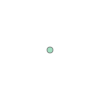

In [43]:
derecho_calls.loc[0, 'geometry']
tornado_calls.loc[0, 'geometry']
derecho_dispatch.loc[0, 'geometry']
tornado_dispatch.loc[0, 'geometry']

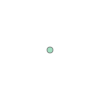

In [44]:
damage_points.loc[0, 'geometry']

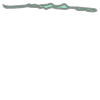

In [45]:
path_polygons.loc[0, 'geometry']

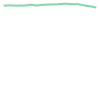

In [46]:
tornado_paths.loc[0, 'geometry']

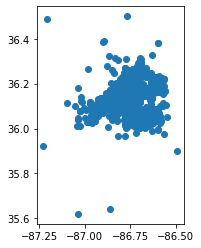

In [47]:
derecho_calls_geo.plot();

<AxesSubplot:>

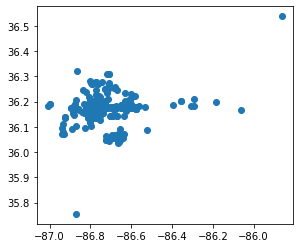

In [48]:
tornado_calls_geo.plot()

<AxesSubplot:>

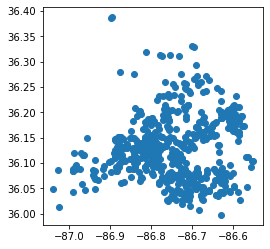

In [49]:
derecho_dispatch_geo.plot()

<AxesSubplot:>

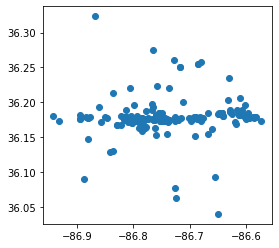

In [50]:
tornado_dispatch_geo.plot()

<AxesSubplot:>

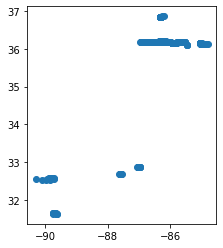

In [51]:
damage_points.plot()

<AxesSubplot:>

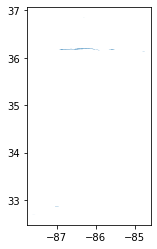

In [52]:
path_polygons.plot()

<AxesSubplot:>

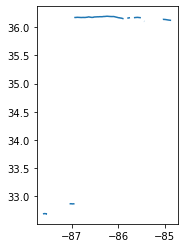

In [53]:
tornado_paths.plot()

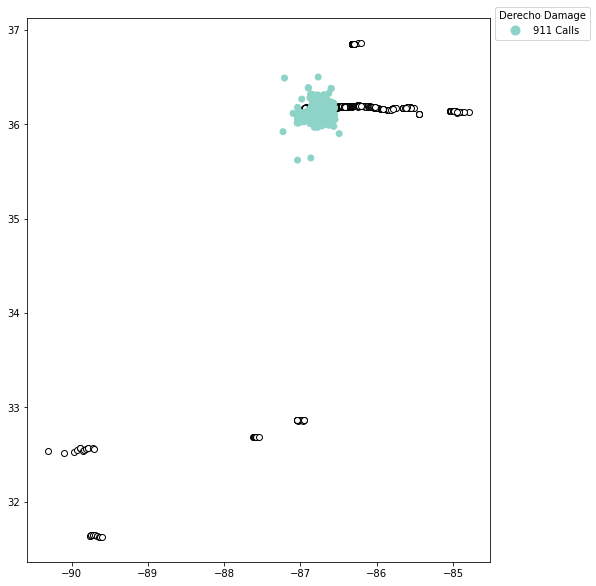

In [72]:
leg_kwds = {'title': 'Derecho Damage', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

ax = damage_points.plot(figsize=(10, 10), color = 'white', edgecolor = 'black')
derecho_calls_geo.plot(ax = ax, column = 'Call_Type',  legend = True, legend_kwds = leg_kwds, cmap = 'Set3')
plt.show()

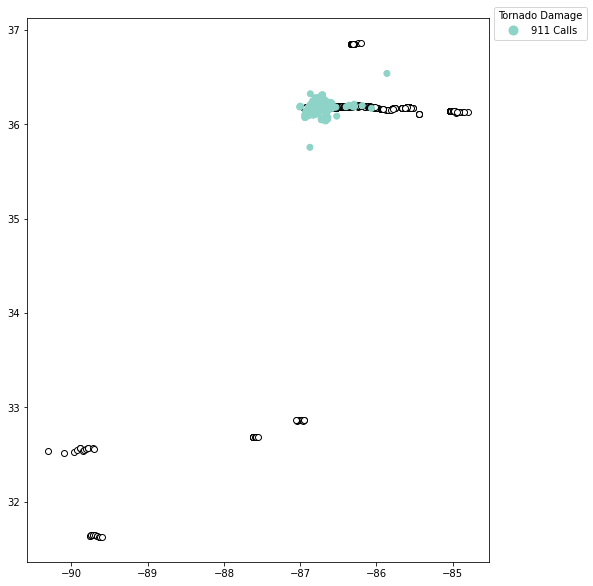

In [71]:
leg_kwds = {'title': 'Tornado Damage', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

ax = damage_points.plot(figsize=(10, 10), color = 'white', edgecolor = 'black')
tornado_calls_geo.plot(ax = ax, column = 'Call_Type',  legend = True, legend_kwds = leg_kwds, cmap = 'Set3')
plt.show()

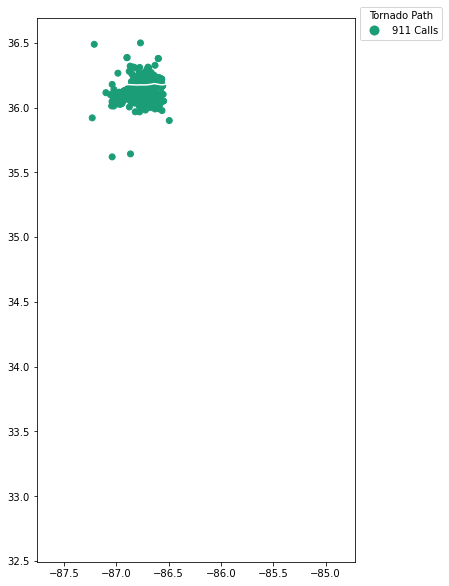

In [75]:
leg_kwds = {'title': 'Tornado Path', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

ax = tornado_paths.plot(figsize=(10, 10), color = 'white', edgecolor = 'black')
derecho_calls_geo.plot(ax = ax, column = 'Call_Type',  legend = True, legend_kwds = leg_kwds, cmap = 'Dark2')
plt.show()

KeyError: 'efscale'

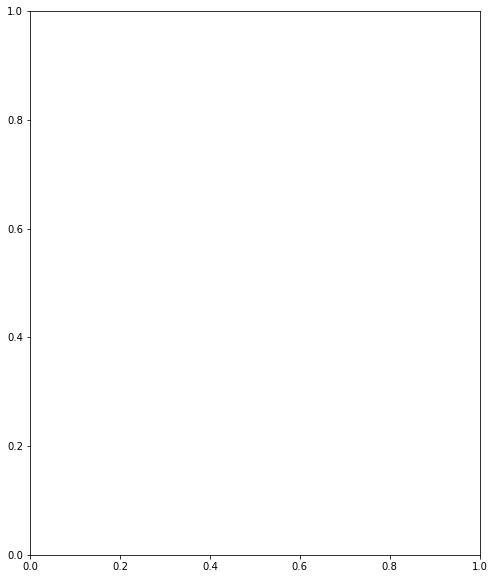

In [79]:
leg_kwds = {'title': 'Damage', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 1}

damage_points.plot(column = 'efscale', figsize=(14, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

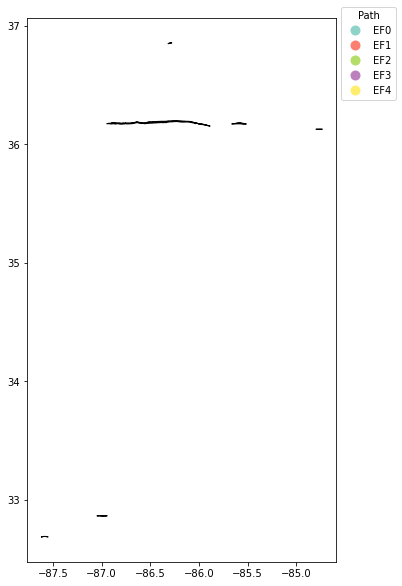

In [76]:
leg_kwds = {'title': 'Path', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 1}

path_polygons.plot(column = 'efscale', figsize=(14, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

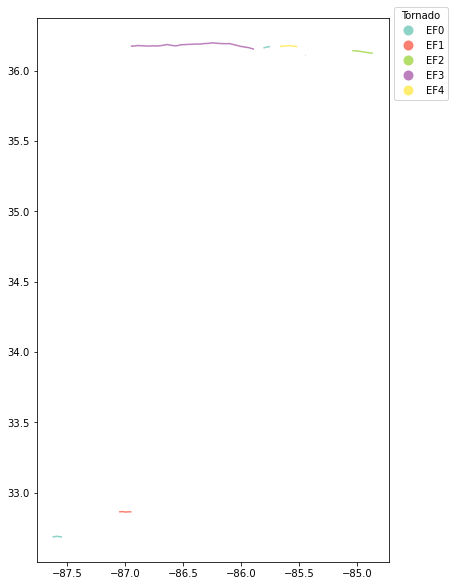

In [77]:
leg_kwds = {'title': 'Tornado', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 1}

tornado_paths.plot(column = 'efscale', figsize=(14, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

In [80]:
path_polygons = path_polygons[['efscale', 'geometry']]

In [82]:
path_polygons.head(3)

efscale                                           geometry
0     EF3  POLYGON ((-85.59922 36.17660, -85.59840 36.176...
1     EF1  POLYGON ((-85.52390 36.17189, -85.52430 36.171...
2     EF1  POLYGON ((-85.61527 36.17529, -85.61403 36.175...

In [83]:
area_center = (36.17000, -86.78000)

In [ ]:
stormPalette = {'T': 'green',
               'D': 'magenta',
               'P': 'yellow'}
stormPalette

#### Heatmapping

In [84]:
# Heatmapping points to be used and placed in new dataframe.
damage_points['lng'] = damage_points.geometry.y
damage_points['lng'] = damage_points.geometry.x
damage_points_lat_lng = damage_points[['lng','lat']]

In [85]:
damageArr = damage_points_lat_lng.values
map.add_child(plugins.HeatMap(damageArr, radius = 15))


AttributeError: type object 'map' has no attribute 'add_child'

#### Folium Maps

In [86]:
##Nashville Map
nashville_tornado = tornado_paths.loc[tornado_paths.event_id == 'Nashville']
   
map_tornado = folium.Map(location =  area_center, zoom_start = 12) 

In [87]:
map_tornado

#### Dropping na values

In [94]:
derecho_calls = derecho_calls.dropna()
tornado_calls = tornado_calls.dropna()

In [95]:
map_tornado = folium.Map(location = area_center, zoom_start = 12)

#folium.GeoJson(tornado_paths, style_function = lambda x: {'color':'#119617', 'fillColor': '#1119617'}).add_to(map_tornado)
#folium.GeoJson(path_polygons, style_function = lambda x: {'color': '#clcba2', 'fillcolor': '#clcba2'}).add_to(map_tornado)
folium.GeoJson(damage_points).add_to(map_tornado)

for row_index, row_values in derecho_calls.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Call_Type'])
    icon=folium.Icon(color="red",icon="call", prefix='fa')

    marker = folium.Marker(location = loc, popup = pop, icon = icon)
    marker.add_to(map_tornado)
    
map_tornado

In [ ]:
map_tornado = folium.Map(location = area_center, zoom_start = 12)

folium.GeoJson(damage_points).add_to(map_tornado)
folium.GeoJson(path_polygons).add_to(map_tornado)
folium.GeoJson(tornado_paths, style_function = lambda x: {'color': '#00FF00', 'fillcolor': '00FF00'}).add_to(map_tornado)

map_tornado

In [ ]:
map_tornado = folium.Map(location =  [34, -87.5], zoom_start = 6)

folium.GeoJson(damage_points).add_to(map)
folium.GeoJson(path_polygons).add_to(map)
folium.GeoJson(tornado_paths).add_to(map)

map_tornado